In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import statsmodels

In [27]:
# set working directory to the directory with input files
cd "/home/aswin/aksharad/share_figure/figure_1/"

/home/aswin/aksharad/share_figure/figure_1


In [28]:
## all superfam list
df_sf=pd.read_csv("./sf_list",sep=" ", header=None)
df_sf=df_sf.iloc[:,[0,3]]
df_sf.columns=["superfamily","SFAM_name"]


## loading list of superfams with both tf and ntf
df_sf_with_ntf=pd.read_csv("./sf_with_btf_tf_ntf", header=None)
df_sf_with_ntf.columns=["sf"]
df_sf_with_ntf["SFAM"]=df_sf_with_ntf["sf"].str.split("_").str[0]
print(df_sf_with_ntf)

                                                   sf       SFAM
0                    IPR009057_SSF46689_Homeobox-like  IPR009057
1                     IPR009061_SSF46955_Putative_DBD  IPR009061
2                 IPR010919_SSF63763_SAND-like_domain  IPR010919
3        IPR010982_SSF47413_Lambda_repressor-like_DBD  IPR010982
4               IPR010985_SSF47598_Ribbon-helix-helix  IPR010985
5          IPR015300_SSF101936_DNA-bd_pseudobarrel_sf  IPR015300
6               IPR016177_SSF54171_DNA-binding_domain  IPR016177
7     IPR025659_SSF54518_Tubby_C-terminal_domain-like  IPR025659
8                        IPR035975_SSF54957_Viral_DBD  IPR035975
9                      IPR036236_SSF57667_Znf_C2H2_sf  IPR036236
10                    IPR036390_SSF46785_Winged_helix  IPR036390
11                    IPR036576_SSF118290_WRKY_domain  IPR036576
12  IPR036638_SSF47459_Helix-loop-helix_DNA-bindin...  IPR036638
13                         IPR046347_SSF57959_bZIP_sf  IPR046347


In [29]:
## loading file with tf/ntf counts
## overall count matrix
df=pd.read_csv("./total_tf_ntf_info", sep="\t")
df=df.drop([df.index[1271], df.index[1272]])

## matrix for superfam with TF and nTF (df_x)
df_x=pd.DataFrame()
for i in df_sf_with_ntf["SFAM"].to_list():
    df_tf=df.loc[:,[i+"_TF"]]
    df_ntf=df.loc[:,[i+"_NTF"]]
    df_un=df.loc[:,[i+"_UN"]]
    df_x=pd.concat([df_x,df_tf, df_ntf,df_un], axis=1)
    #print(df_ntf)
#print(df_x)
tf=[e for e in df_x.columns if e.endswith("_TF")]
df_tf=df_x.loc[:,tf]
df_x['Total_TF'] = df_tf.sum(axis=1)

ntf=[e for e in df_x.columns if e.endswith("_NTF")]
df_tf=df_x.loc[:,ntf]
df_x['Total_NTF'] = df_tf.sum(axis=1)

un=[e for e in df_x.columns if e.endswith("_UN")]
df_tf=df_x.loc[:,un]
df_x["Total_UN"] = df_tf.sum(axis=1)
df_x["SF_prot_count"]=df_x["Total_TF"] + df_x["Total_NTF"] + df_x["Total_UN"]
df_x["TF_SF_ratio"]=df_x["Total_TF"]/(df_x["Total_TF"] + df_x["Total_NTF"] + df_x["Total_UN"])

df_r=df.loc[:,["organism", "Total_protein","kingdom"]]
df_x=pd.concat([df_x, df_r], axis=1)

df_x["TF_prot_percent"]=(df_x["Total_TF"]/df_x["Total_protein"])*100
df_x["SF_prot_percent"]=((df_x["Total_TF"] + df_x["Total_NTF"] + df_x["Total_UN"])/df_x["Total_protein"])*100




IPR008917_UN
IPR008967_UN
IPR009057_UN
IPR009061_UN
IPR010919_UN
IPR010921_UN
IPR010982_UN
IPR010985_UN
IPR015300_UN
IPR016032_UN
IPR016177_UN
IPR023278_UN
IPR025659_UN
IPR035975_UN
IPR036051_UN
IPR036060_UN
IPR036093_UN
IPR036115_UN
IPR036236_UN
IPR036358_UN
IPR036362_UN
IPR036390_UN
IPR036395_UN
IPR036407_UN
IPR036431_UN
IPR036474_UN
IPR036552_UN
IPR036576_UN
IPR036578_UN
IPR036638_UN
IPR036864_UN
IPR036879_UN
IPR036893_UN
IPR046347_UN


/home/aswin/aksharad/.conda/envs/akd_py/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


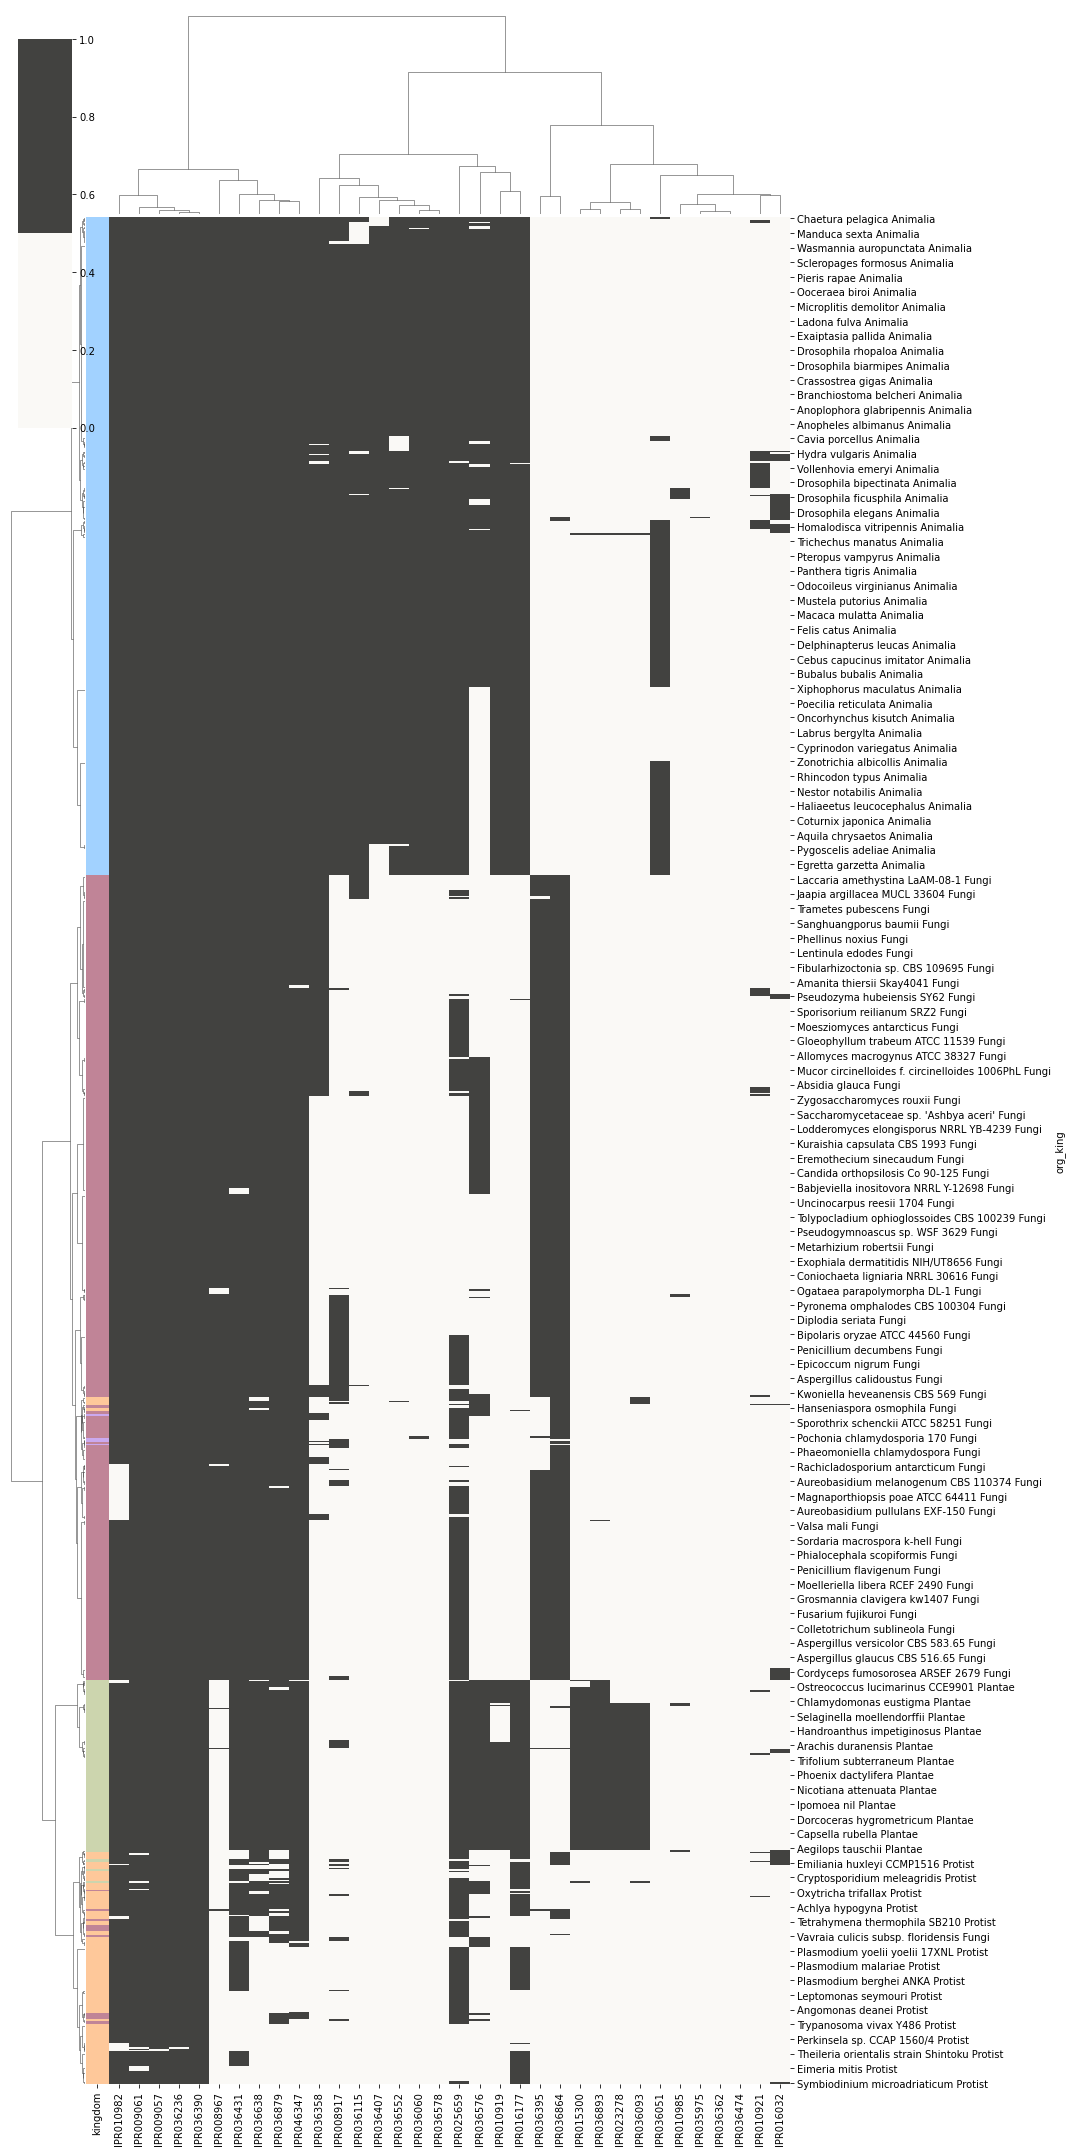

In [30]:
# Figure 1A
#clustering of presence/absence of TF-SF 
df_heat=df.drop(["organism","Total_protein", "Total_TF", "Total_NTF","Total_SF","Total_UN"], axis=1)
df_heat["organism_name"]=df_heat["organism_name"].astype(str)
df_heat[["kingdom"]]=df_heat[["kingdom"]].fillna(value="Choanoflagellate")
df_heat["kingdom"]=df_heat["kingdom"].astype(str)
df_heat["org_king"]=df_heat[['organism_name', 'kingdom']].agg(' '.join, axis=1)
df_heat=df_heat.set_index("org_king")
df_heat=df_heat.sort_index()
heat_map=pd.DataFrame()
for i in df_sf.superfamily.unique():
    #print(i)
    t=i+"_TF"
    n=i+"_NTF"
    u=i+"_UN"
    print(u)
    sfam=df_heat.loc[:,[str(t),str(n),str(u)]]
    heat_map[i]=sfam[t]+sfam[n]+sfam[u]
heat_map=heat_map.apply(lambda x: x.apply(lambda y: 1 if y>0 else 0))
heat_map=pd.concat([heat_map,df_heat.loc[:,["kingdom"]]], axis=1 )

kingdom=heat_map.pop("kingdom")
lut = dict(zip(['Protist',  'Fungi', 'Plantae',"Animalia","Choanoflagellate"], ["#fec89a", "#c08497", "#ccd5ae", "#a2d2ff","#cba9ef"]))
row_colors = kingdom.map(lut)
sns.clustermap(heat_map, method="ward", figsize=(15, 30), cmap=["#FAF9F6","#424240"], row_colors=row_colors,dendrogram_ratio=(.1, .1), cbar_kws={'shrink': .2})


In [31]:
## loading settings for plotting figures
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

palette = ["#fec89a", "#c08497", "#ccd5ae", "#a2d2ff"]
PROPS = {
    'boxprops':{'edgecolor':'black', "linewidth":1},
    'medianprops':{'color':'black', "linewidth":1},
    'whiskerprops':{'color':'black', "linewidth":1},
    'capprops':{'color':'black', "linewidth":1},
    'flierprops':{"markerfacecolor":'black', "markeredgecolor":"black", "linewidth":.5,"markersize":1}
}

Text(0.5, 1.0, 'Total_SF/Total coding Protein')

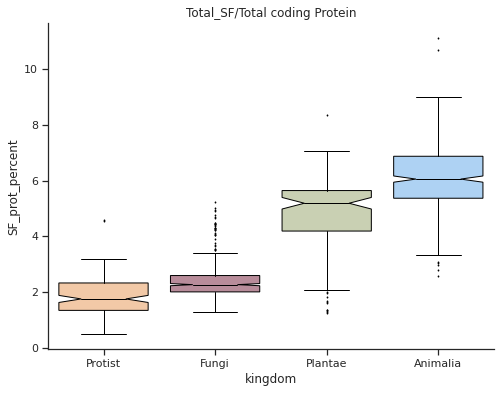

In [32]:
# Figure 1B
df["TF_prot_percent"]=(df["Total_TF"]/df["Total_protein"])*100
df["SF_prot_percent"]=((df["Total_TF"] + df["Total_NTF"] + df["Total_UN"])/df["Total_protein"])*100
df["SF_prot_count"]=df["Total_TF"] + df["Total_NTF"] + df["Total_UN"]
df["overall_TF_SF_ratio"]=df["Total_TF"]/(df["Total_TF"] + df["Total_NTF"] + df["Total_UN"])
np.seterr(divide = 'ignore') 
#df["log_TF"]=np.log(df["Total_TF"])


fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="kingdom", y="SF_prot_percent", data=df_x, order=['Protist',  'Fungi', 'Plantae',"Animalia"], palette=palette,**PROPS, notch=True)
plt.title('Total_SF/Total coding Protein') 


Text(0.5, 1.0, 'TF_SF_ratio')

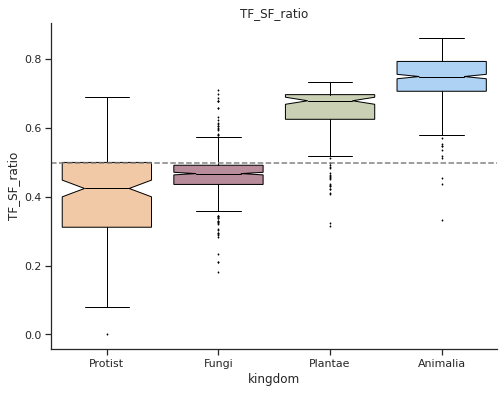

In [33]:
# Figure 1D
#SF with both overall_TF_SF_ratio
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="kingdom", y="TF_SF_ratio", data=df_x,order=['Protist',  'Fungi', 'Plantae',"Animalia"],palette=palette, **PROPS, notch=True)
ax.axhline(y = 0.5,color = "grey", linestyle = "dashed")
plt.title("TF_SF_ratio")
#plt.savefig("/home/aswin/aksharad/panel_fig_1/TF_to_SFwntf_ratio.pdf", format="pdf", dpi=600)

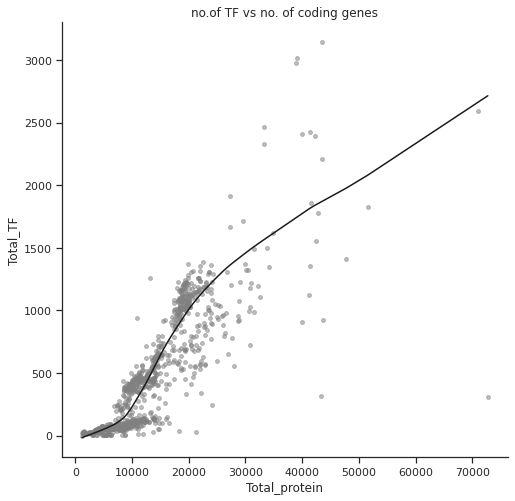

In [34]:
# tf regrssion plot Figure 1E
palette1 = [ "#c08497", "#fec89a","#a2d2ff","#ccd5ae"]
fig, ax = plt.subplots(figsize=(8, 8))
sns.regplot(x="Total_protein", y="Total_TF", data=df_x, lowess=True,line_kws={"ls":"-", "color":"k",'linewidth':1.5},scatter_kws={'s':15,"alpha":0.5,"color":"grey"})
plt.title("no.of TF vs no. of coding genes")
plt.savefig("/home/aswin/aksharad/panel_fig_1/Total_tf_vs_coding_prot_scatter.pdf", format="pdf", dpi=600)

Text(0.5, 1.0, 'no.of nTF vs no. of coding genes')

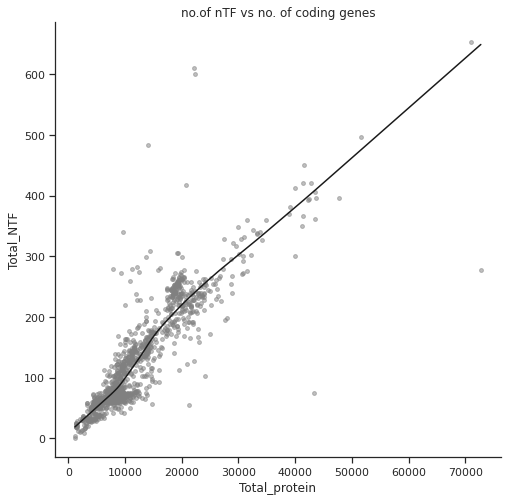

In [35]:
# ntf regression plot Figure 1F
palette1 = [ "#c08497", "#fec89a","#a2d2ff","#ccd5ae"]
fig, ax = plt.subplots(figsize=(8, 8))
sns.regplot(x="Total_protein", y="Total_NTF", data=df_x, lowess=True,line_kws={"ls":"-", "color":"k",'linewidth':1.5},scatter_kws={'s':15,"alpha":0.5,"color":"grey"})
plt.title("no.of nTF vs no. of coding genes")

Text(0, 0.5, 'Protein count')

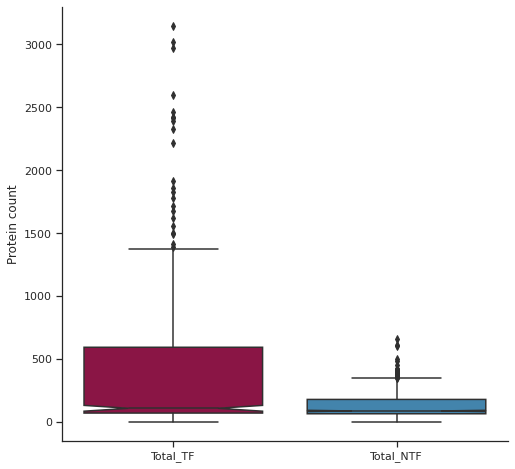

In [36]:
# total tf ntf count for superfam with nTF Figure 1C inset
fig, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(data= df_x,order=["Total_TF","Total_NTF"], palette=["#9e0142","#3288bd"], notch=True)
plt.ylabel("Protein count")


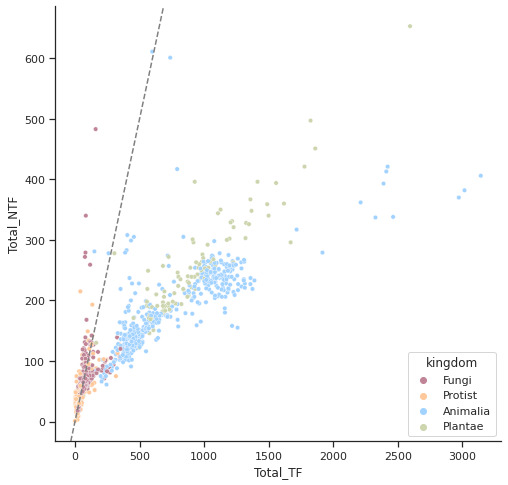

In [37]:
# Figure 1C
# total tf ntf count scatterplot for superfam with nTF 
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x="Total_TF", y="Total_NTF", data=df_x, hue="kingdom",palette=palette1, s=20)
ax.axline((0, 0), (1, 1), linestyle="dashed", color='grey')



[Text(0, 0, 'IPR009057'),
 Text(1, 0, 'IPR009061'),
 Text(2, 0, 'IPR010919'),
 Text(3, 0, 'IPR010982'),
 Text(4, 0, 'IPR010985'),
 Text(5, 0, 'IPR015300'),
 Text(6, 0, 'IPR016177'),
 Text(7, 0, 'IPR025659'),
 Text(8, 0, 'IPR036236'),
 Text(9, 0, 'IPR036390'),
 Text(10, 0, 'IPR036576'),
 Text(11, 0, 'IPR036638'),
 Text(12, 0, 'IPR046347')]

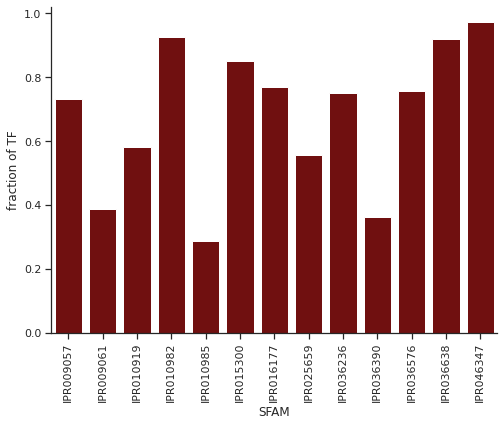

In [38]:
# Figure S2 A
## total TF to total superfam protein ratio across all organism for SF with nTF
A=[]
for i in df_sf_with_ntf["SFAM"].to_list():
    tf=i+"_TF"
    ntf=i+"_NTF"
    un=i+"_UN"
    dfs=df_x.loc[:,[tf,ntf,un, "kingdom"]]
    dfs["total_sf"]=dfs[tf]+dfs[ntf]+dfs[un]
    dfs["TF_SF_ratio"]=dfs[tf]/dfs["total_sf"]
    dfs["total_sf"]=dfs[tf]+dfs[ntf]+dfs[un]
    A.append([i,sum(dfs[tf].to_list())/sum(dfs.total_sf.to_list())])
df_A=pd.DataFrame(A, columns=["SFAM", "fraction of TF"])
df_A=df_A[df_A.SFAM!="IPR035975"]
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="SFAM", y="fraction of TF", data=df_A, color="maroon")
ax.set_xticklabels(df_A.SFAM, rotation=90)


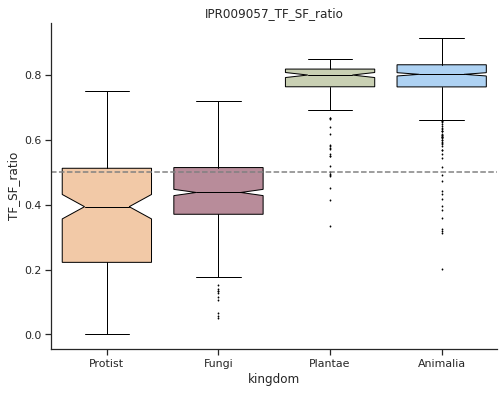

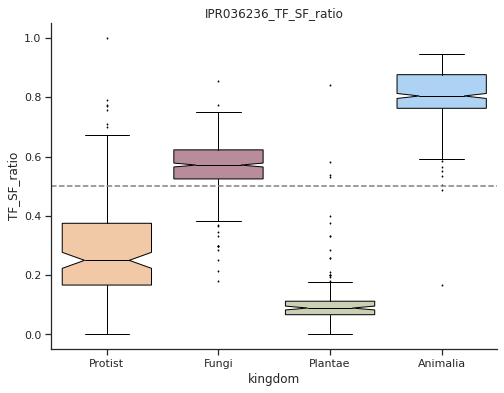

In [40]:
# Figure S1. G H
# distribution of TFs and nTFs with SF for homeodomain and Znf-C2H2
for i in ["IPR009057","IPR036236"]:
    tf=i+"_TF"
    ntf=i+"_NTF"
    un=i+"_UN"
    dfs=df_x.loc[:,[tf,ntf,un, "kingdom"]]
    dfs["total_sf"]=dfs[tf]+dfs[ntf]+dfs[un]
    dfs["TF_SF_ratio"]=dfs[tf]/dfs["total_sf"]
    dfs["total_sf"]=dfs[tf]+dfs[ntf]+dfs[un]
    
    
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.boxplot(x="kingdom", y="TF_SF_ratio", data=dfs,order=['Protist',  'Fungi', 'Plantae',"Animalia"],palette=palette, **PROPS, notch=True,ax=ax)
    plt.title(i +"_TF_SF_ratio")
    ax.axhline(y = 0.5,color = "grey", linestyle = "dashed")
    
    

    